In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import os

In [2]:
import pywt

In [2]:
# Discrete Fourier Transform
def discrete_fourier_transform(audio_path):
    # Perform the Fourier transform
    data, sample_rate = librosa.load(audio_path)
    frequencies = np.fft.rfftfreq(data.size, d=1./sample_rate)
    fft_values = np.fft.rfft(data)
    return frequencies, fft_values

In [3]:
# Pitch Tracking
def pitch_tracking(audio_path):
    data, sample_rate = librosa.load(audio_path)
    # Estimate the pitch track
    pitches, magnitudes = librosa.piptrack(y = data, sr = sample_rate)

    # Select out pitches with high enough magnitudes (median is chosen as the comparing metric)
    pitches = pitches[magnitudes > np.median(magnitudes)]
    return pitches


In [4]:
audio_files_dir = r'archive/16000_pcm_speeches'
dir_dict = {}

# Iterate through audio files in the directory
for class_name in os.listdir(audio_files_dir):
    if(class_name.endswith('.py') or class_name.endswith('.ipynb_checkpoints')):
        continue
        
    class_dir = os.path.join(audio_files_dir, class_name)
    
    if os.path.isdir(class_dir):
        audio_files_list = []
        
        for audio_file in os.listdir(class_dir):
            
            if audio_file.endswith('.wav'):
                audio_file_path = os.path.join(class_dir, audio_file)
                audio_files_list.append(audio_file_path)
        
        dir_dict[class_dir] = audio_files_list

In [5]:
def calculate_zero_crossing_rate(audio_path):
    data, sample_rate = librosa.load(audio_path)
    zcr = librosa.feature.zero_crossing_rate(data)
    return r'Zero Crossing Rate: ' + str(np.mean(zcr))
    # A low zero-crossing rate could indicate a more tonal signal, or a portion where the frequency is relatively stable.

In [6]:
def calculate_energy_envelope(audio_path):
    data, sample_rate = librosa.load(audio_path)
    
    # Calculate the energy of the signal
    energy = np.square(data)
    print("Sampling rate: ", sample_rate)
    
    # Smooth the energy signal by applying a moving average filter
    window_size = 10 # Window size for convolution
    energy_smoothed = np.convolve(energy, np.ones(window_size)/window_size, mode='same')
    return data, energy_smoothed

archive/16000_pcm_speeches\Benjamin_Netanyau
Zero Crossing Rate: 0.17177512428977273
Sampling rate:  22050


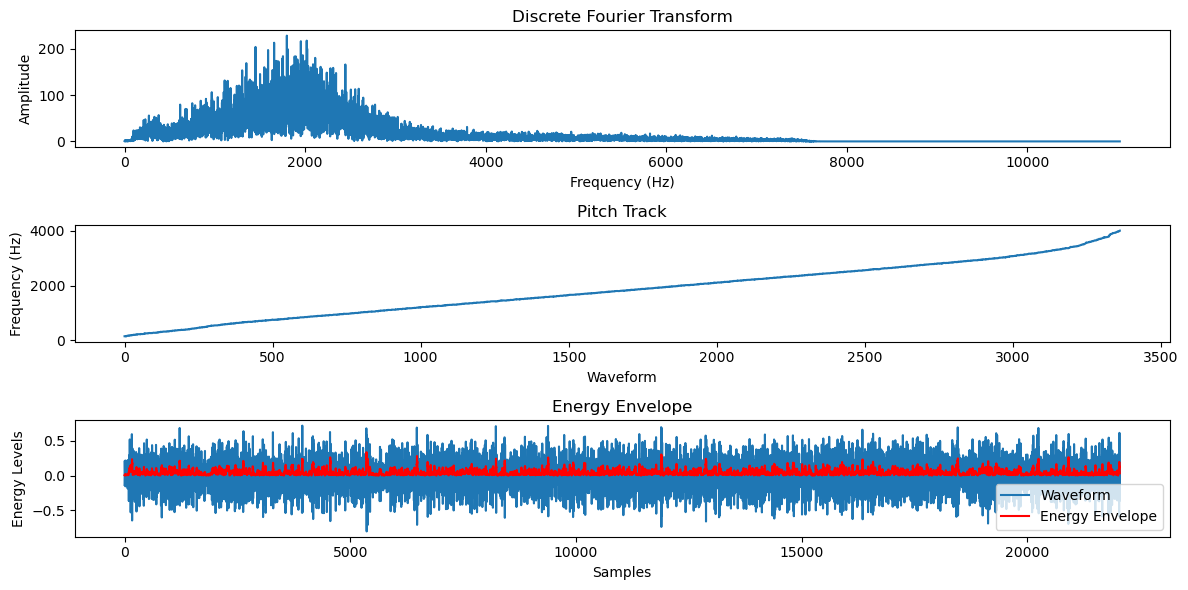

Zero Crossing Rate: 0.059259588068181816
Sampling rate:  22050


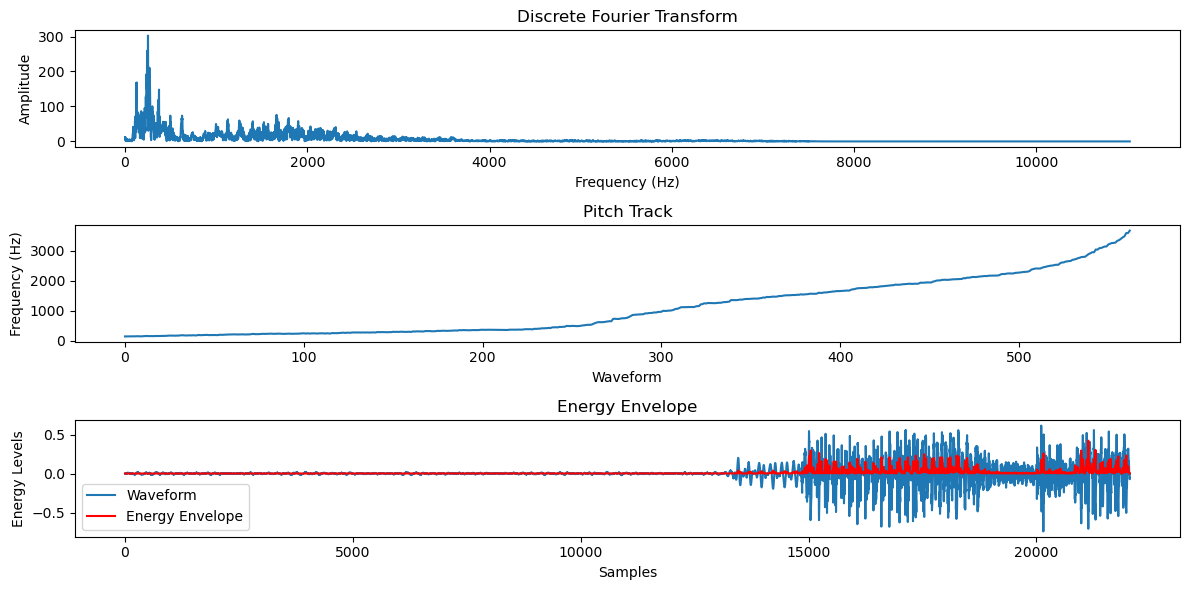

archive/16000_pcm_speeches\Jens_Stoltenberg
Zero Crossing Rate: 0.20777476917613635
Sampling rate:  22050


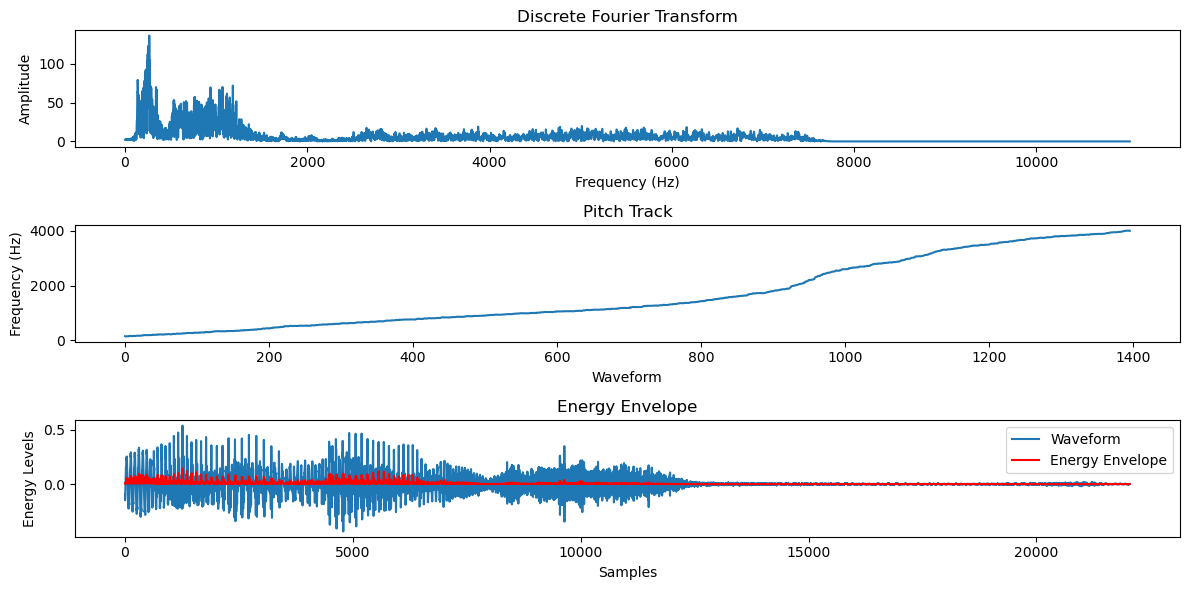

Zero Crossing Rate: 0.0738525390625
Sampling rate:  22050


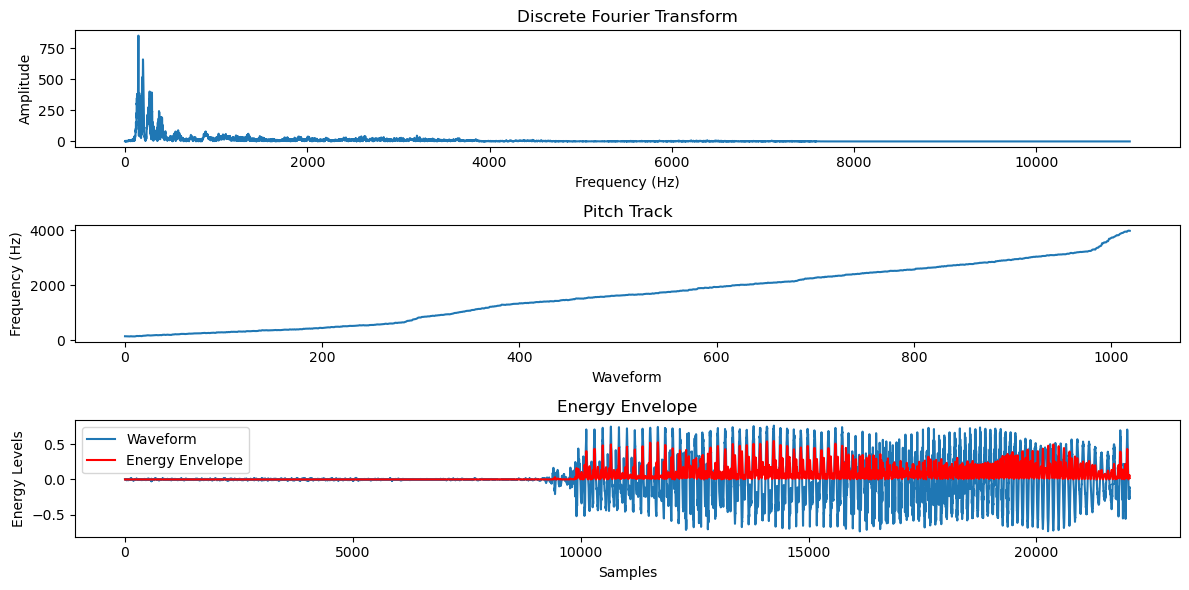

archive/16000_pcm_speeches\Julia_Gillard
Zero Crossing Rate: 0.0780029296875
Sampling rate:  22050


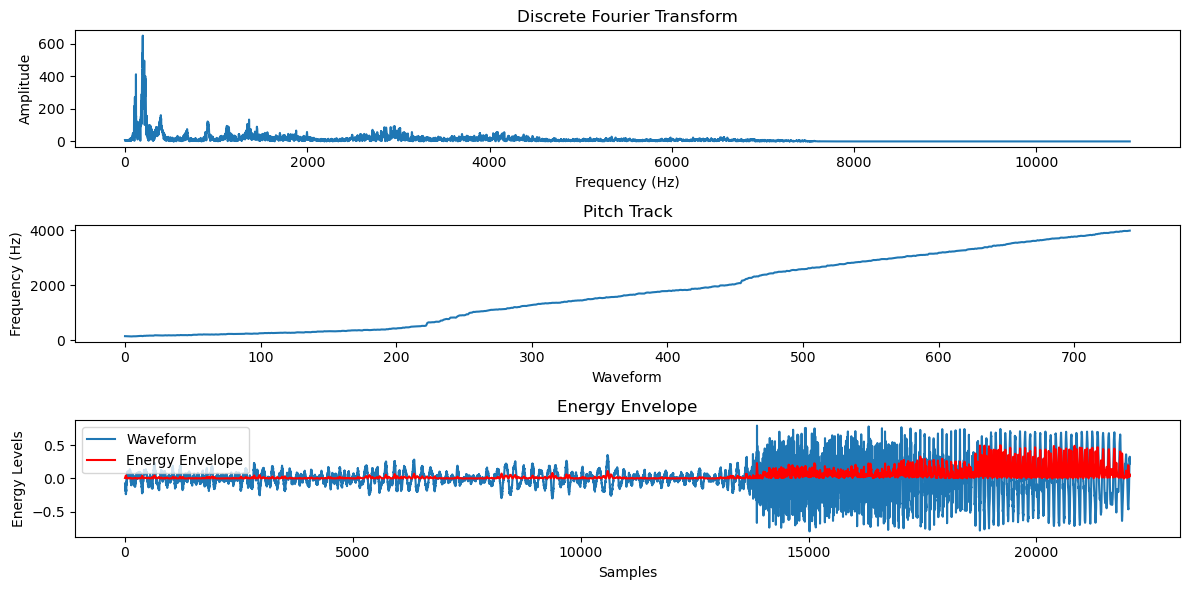

Zero Crossing Rate: 0.1631747159090909
Sampling rate:  22050


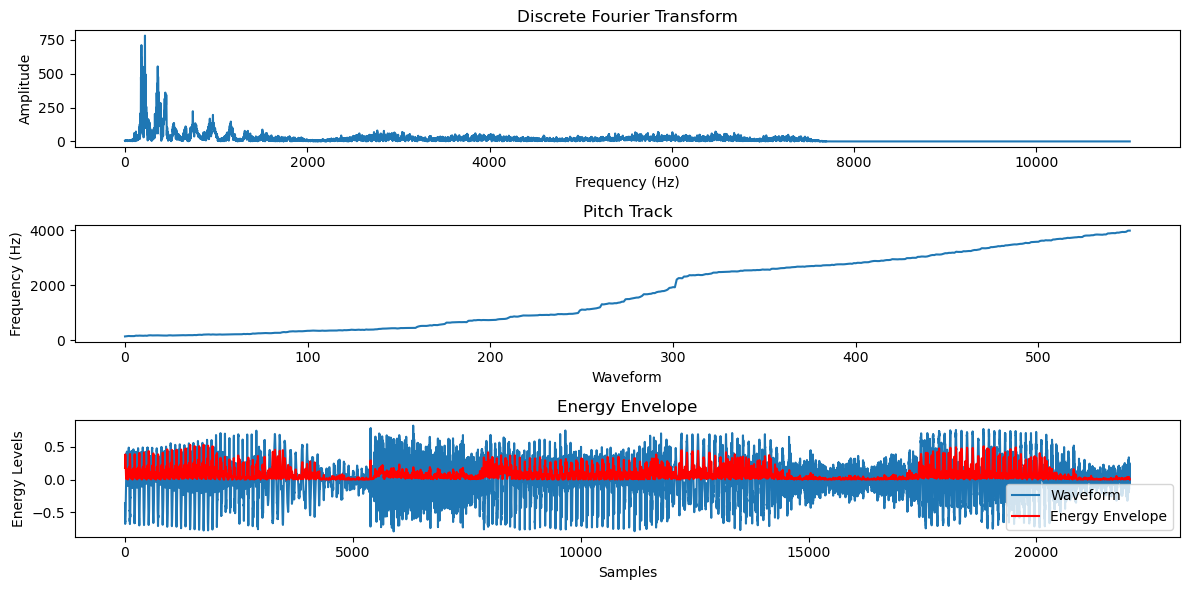

archive/16000_pcm_speeches\Magaret_Tarcher
Zero Crossing Rate: 0.04476651278409091
Sampling rate:  22050


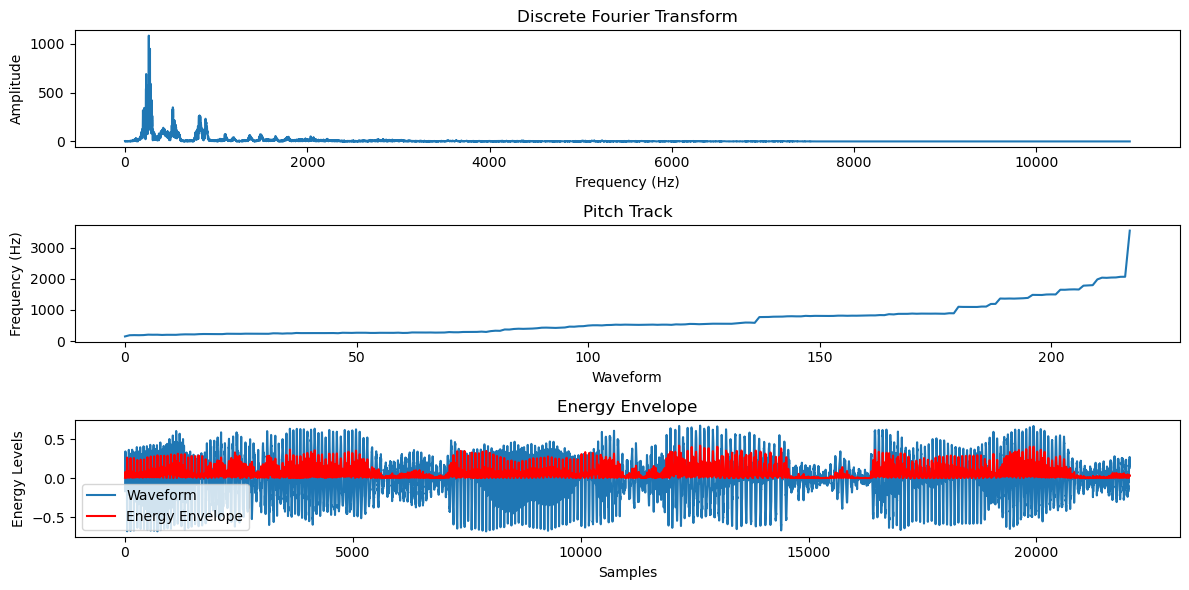

Zero Crossing Rate: 0.054609818892045456
Sampling rate:  22050


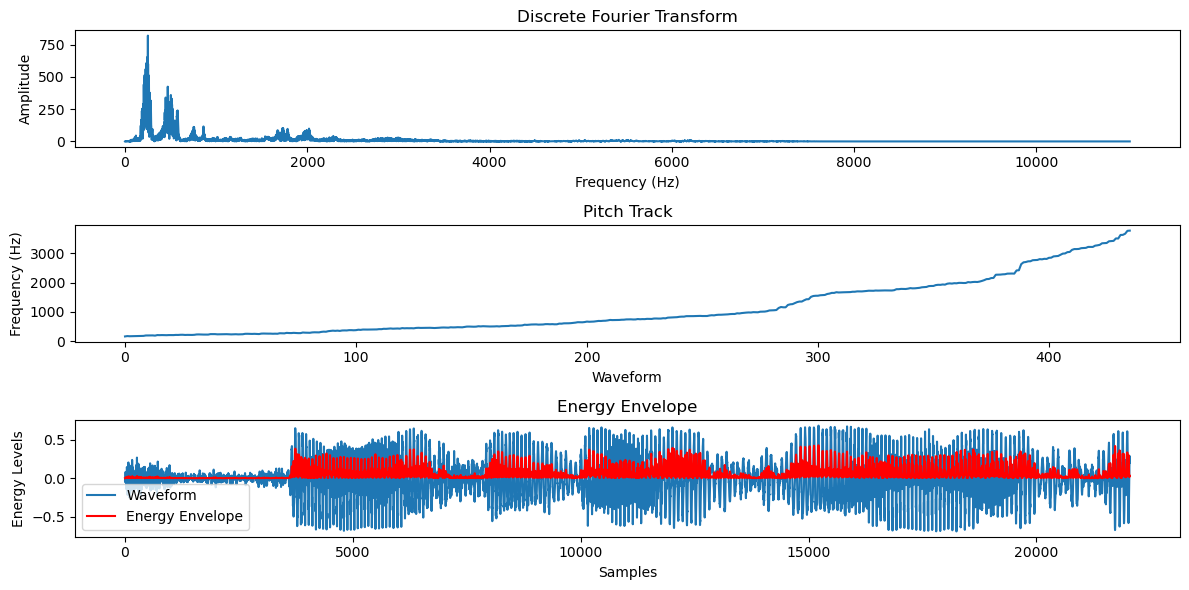

archive/16000_pcm_speeches\Nelson_Mandela
Zero Crossing Rate: 0.11844149502840909
Sampling rate:  22050


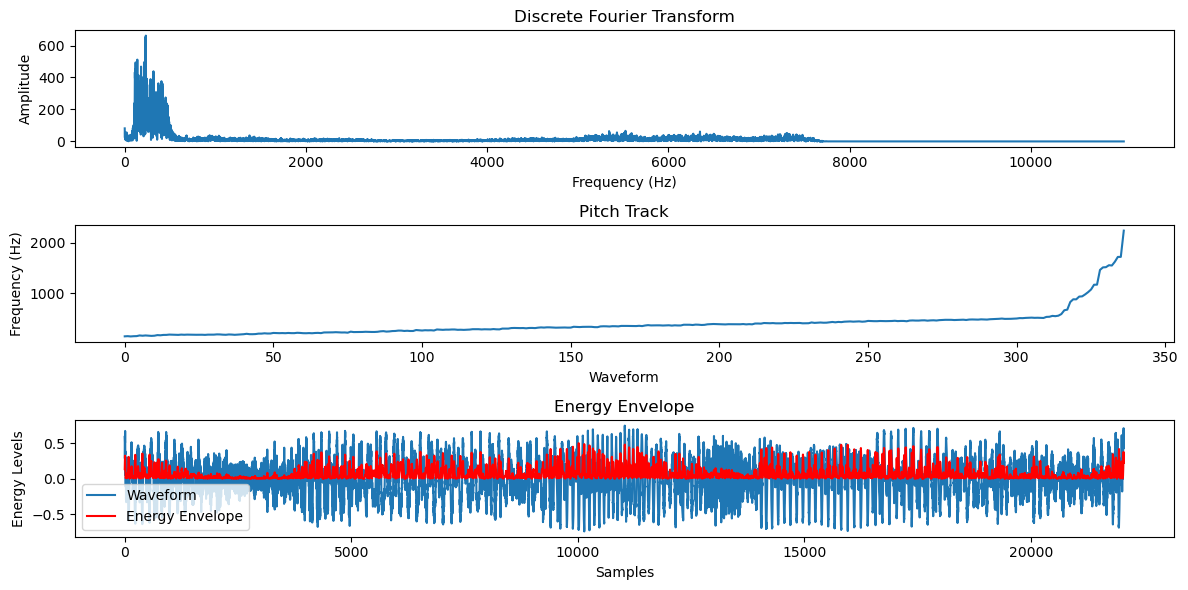

Zero Crossing Rate: 0.18018687855113635
Sampling rate:  22050


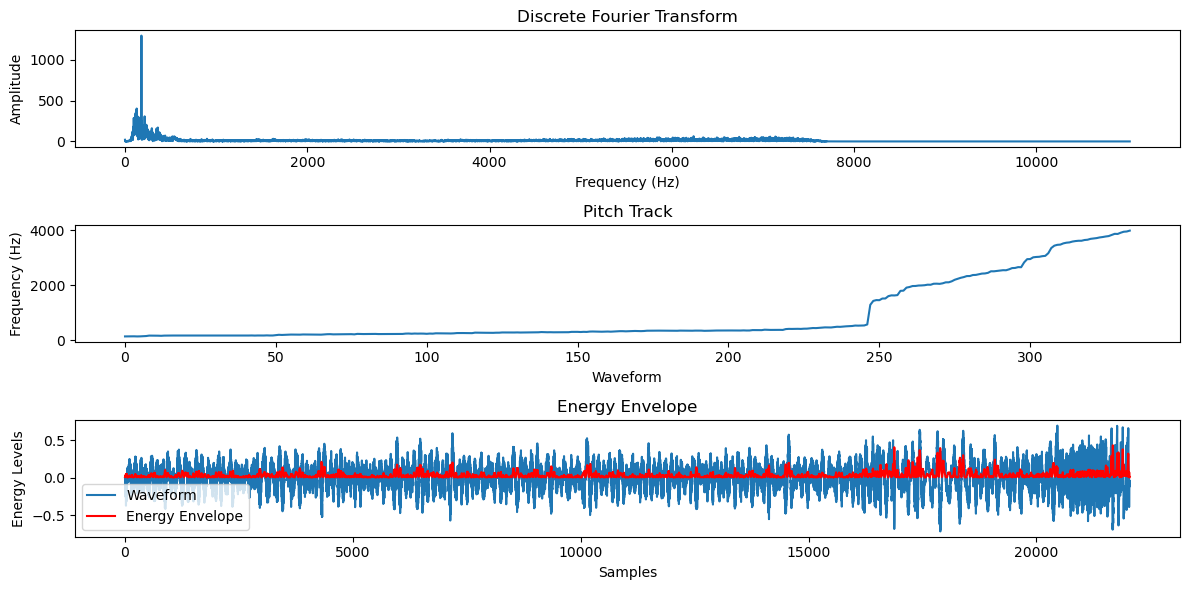

archive/16000_pcm_speeches\other
Zero Crossing Rate: 0.2795933975786581
Sampling rate:  22050


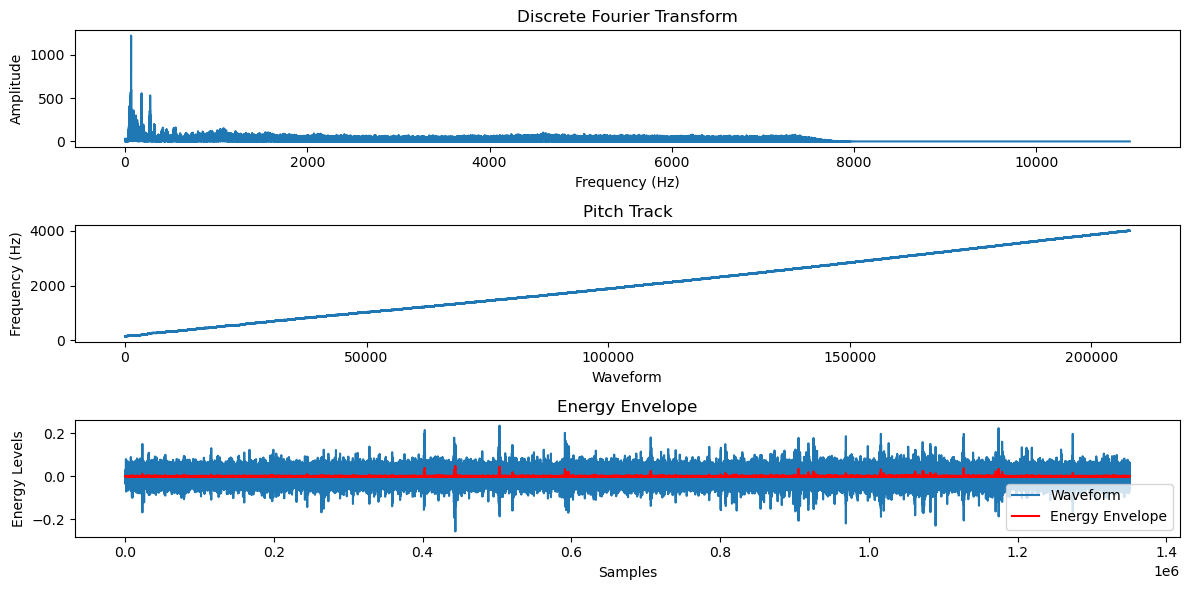

Zero Crossing Rate: 0.12261509378628097
Sampling rate:  22050


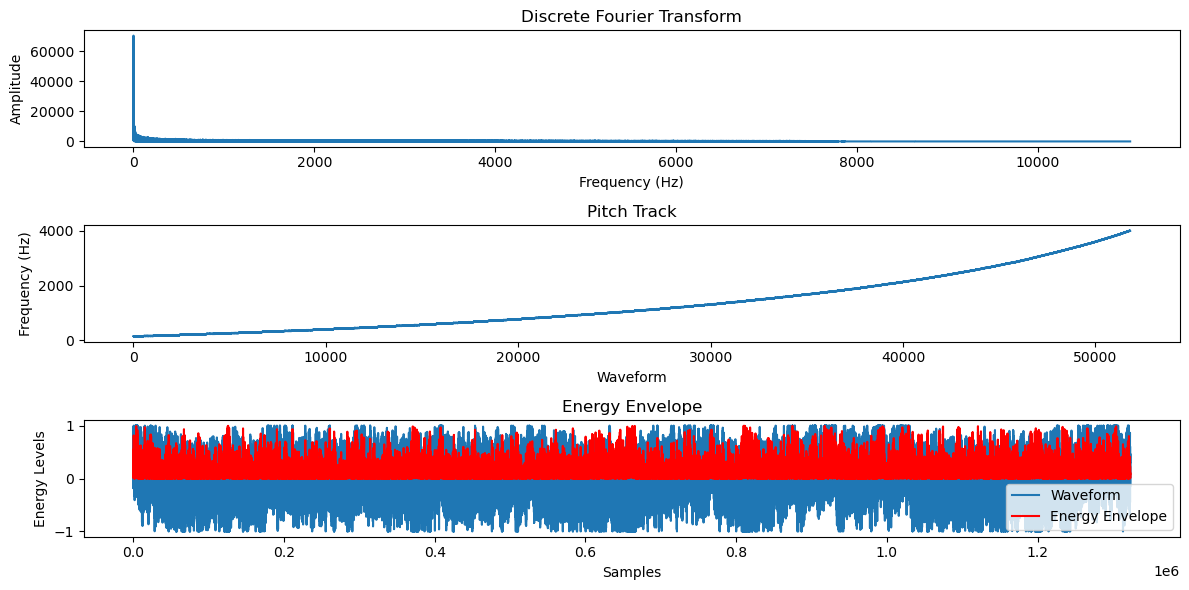

archive/16000_pcm_speeches\_background_noise_
Zero Crossing Rate: 0.3641612314327069
Sampling rate:  22050


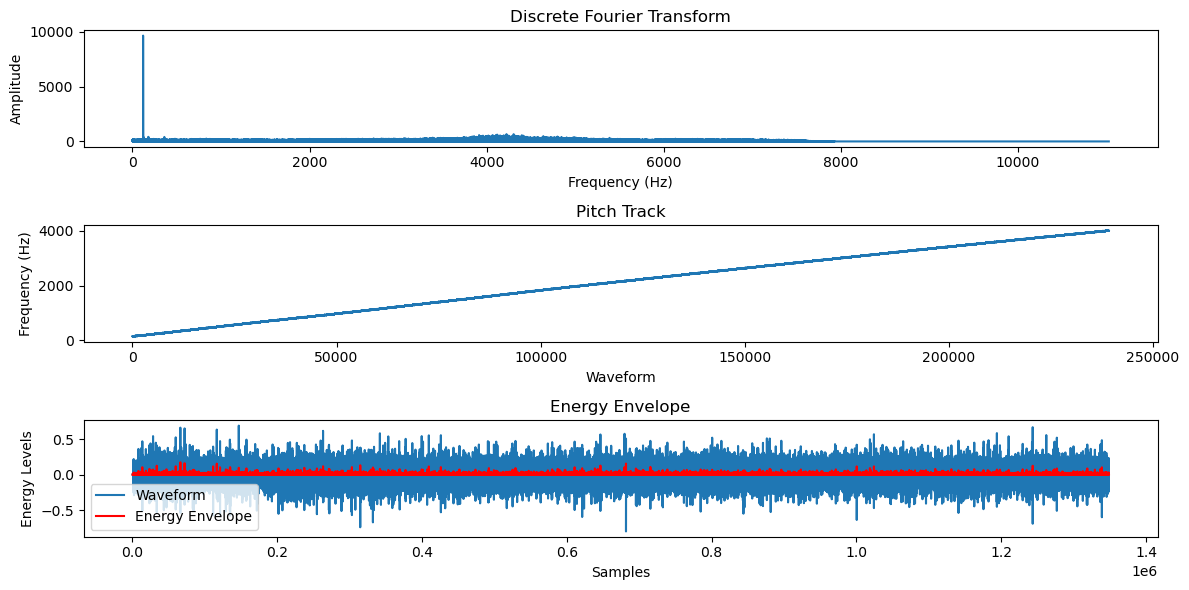

Zero Crossing Rate: 0.2511561370092975
Sampling rate:  22050


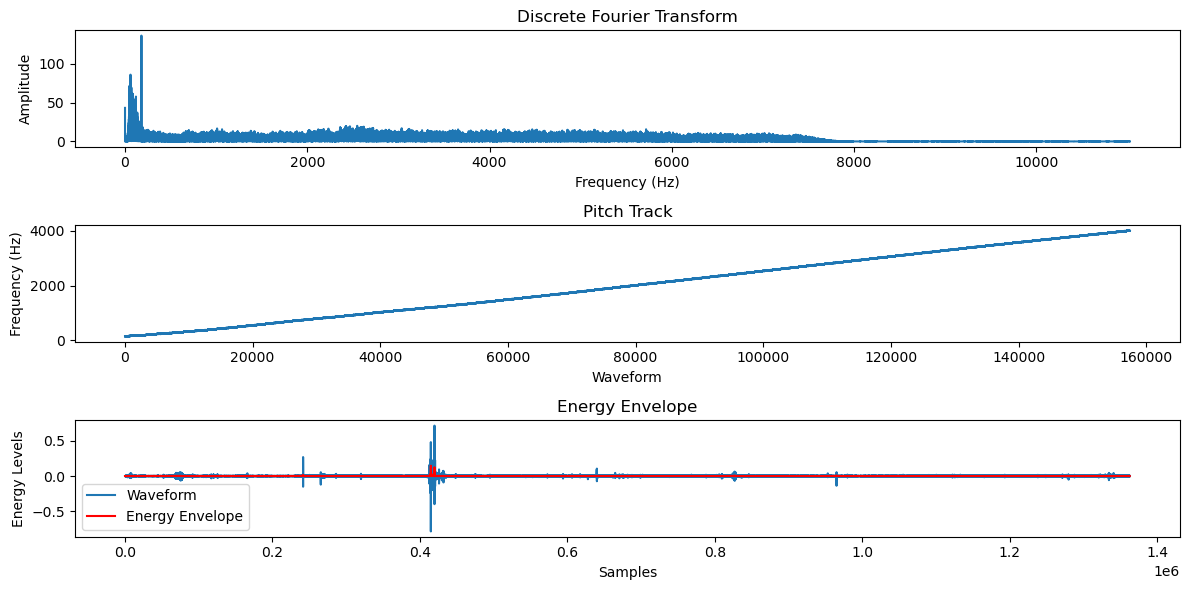

In [7]:
import random

for class_name in dir_dict:
    audio_paths = dir_dict[class_name]
    print(class_name)
    random_audio_paths = random.sample(audio_paths, 2)
    for audio_path in random_audio_paths:
        
        print(calculate_zero_crossing_rate(audio_path))
        frequencies, fft_values = discrete_fourier_transform(audio_path)
        pitches = pitch_tracking(audio_path)
        data, energy_smoothed = calculate_energy_envelope(audio_path)
        
        fig, axes = plt.subplots(3, 1, figsize=(12, 6))
        axes[0].set_title("Discrete Fourier Transform")
        axes[0].plot(frequencies, np.abs(fft_values))
        axes[0].set_xlabel('Frequency (Hz)')
        axes[0].set_ylabel('Amplitude')
        
        axes[1].set_title("Pitch Track")
        axes[1].plot(pitches)
        axes[1].set_ylabel('Frequency (Hz)')
        axes[1].set_xlabel('Waveform')
        
        axes[2].set_title("Energy Envelope")
        axes[2].plot(data, label='Waveform')
        axes[2].set_xlabel("Samples")
        axes[2].set_ylabel("Energy Levels")
        axes[2].plot(energy_smoothed, label='Energy Envelope', color='r')
        axes[2].legend()
        
        plt.tight_layout()
        plt.show()

In [3]:
# Load the audio file
data, sample_rate = librosa.load(r'C:\Users\prava\OneDrive\Desktop\IIITD Coursework\Sem7\ML\ml_project\Guest-Speaker-Recognition\archive\16000_pcm_speeches\Benjamin_Netanyau\1.wav')

7


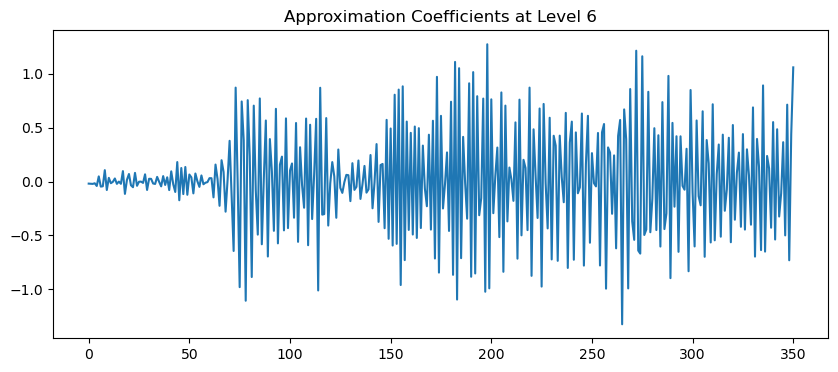

In [37]:
# Apply wavelet transform
coeffs = pywt.wavedec(data, 'db4', level=6)
print(len(coeffs))
# Plot the approximation coefficients at level 6
plt.figure(figsize=(10, 4))
plt.plot(coeffs[0])
plt.title('Approximation Coefficients at Level 6')
plt.show()

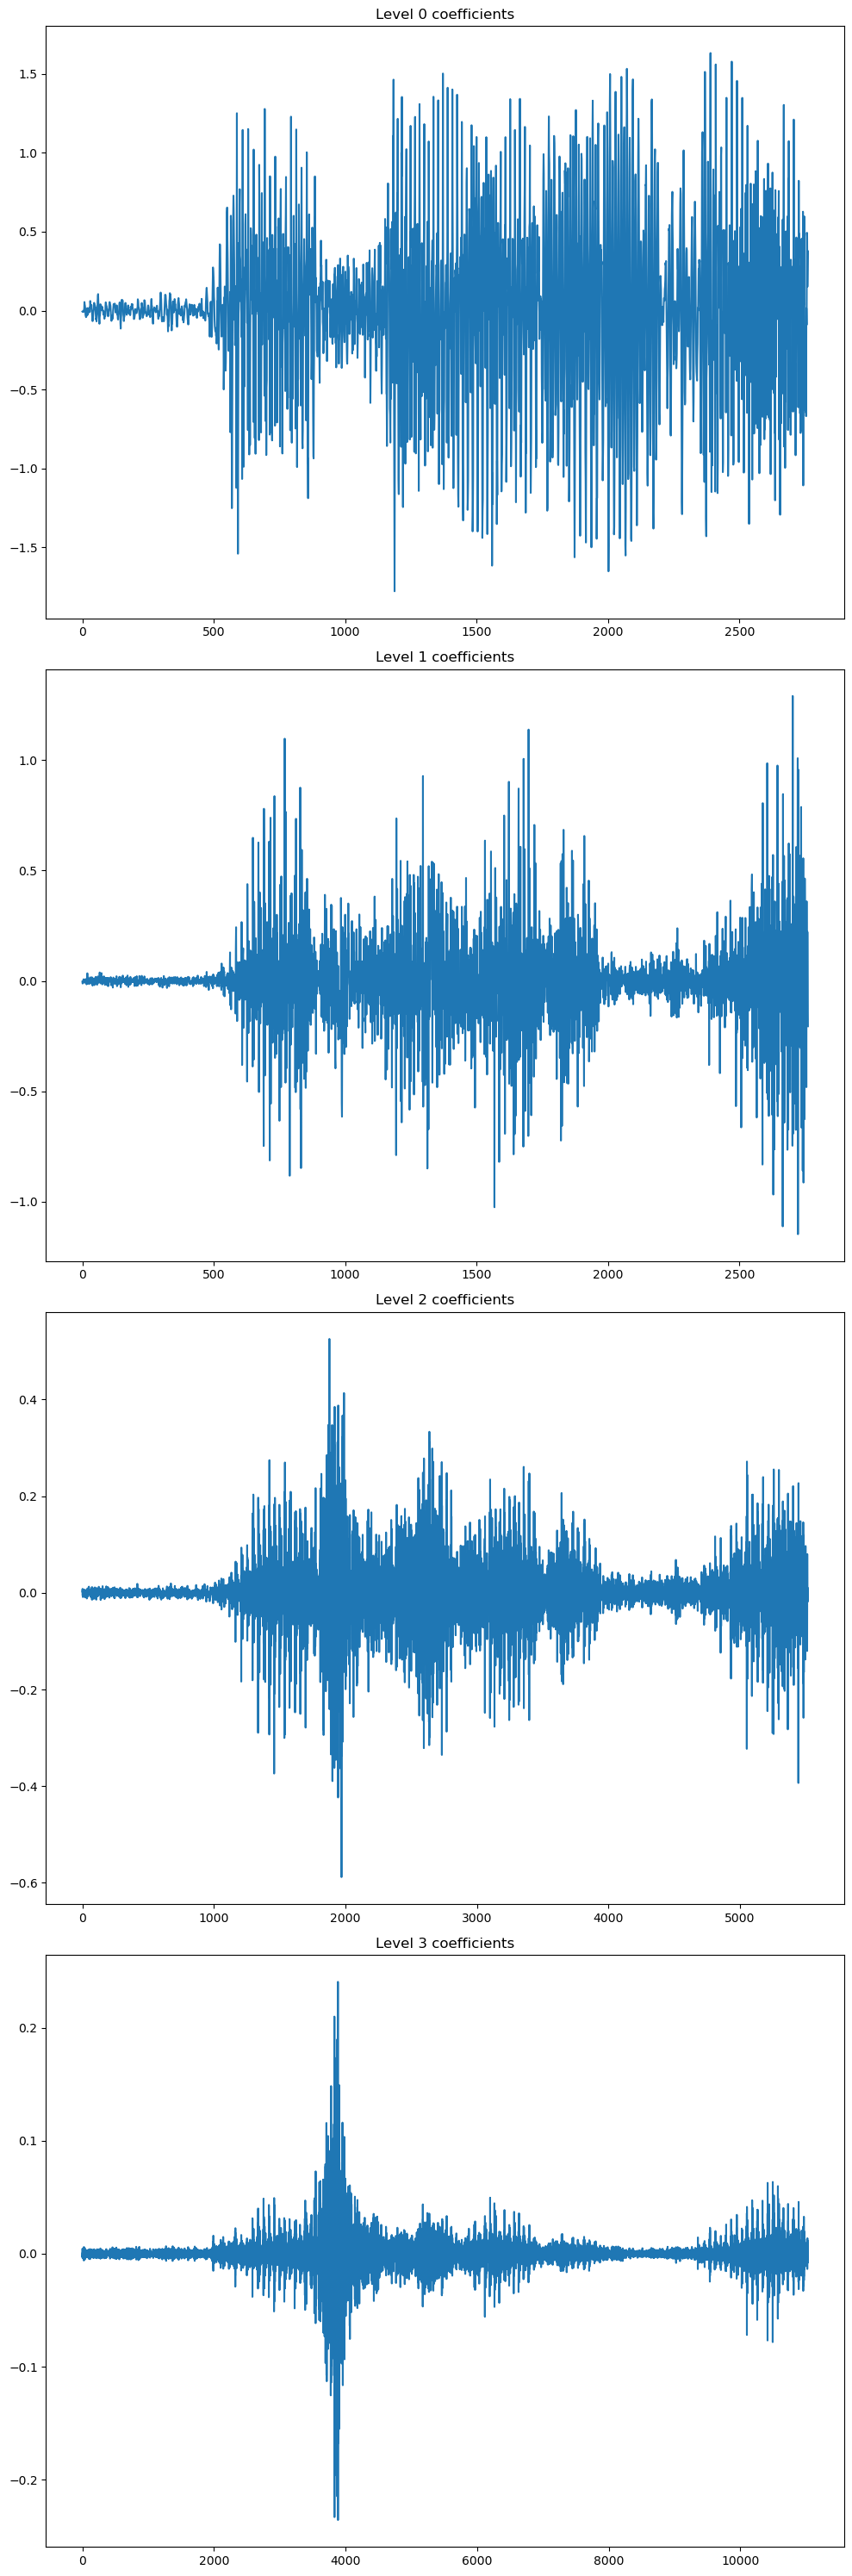

In [55]:
# Choose a wavelet
wavelet = 'db4'

# Perform DWT
coeffs = pywt.wavedec(data, wavelet, level=3)

# 'coeffs' is a list of arrays containing the approximation and detail coefficients at each level.
# The first element of 'coeffs' contains the approximation coefficients at the highest level.
# The remaining elements contain the detail coefficients at each level, in descending order.

# You can plot the coefficients to visualize them
plt.figure(figsize=(10,30))
for i, coeff in enumerate(coeffs):
    plt.subplot(len(coeffs), 1, i+1)
    plt.plot(coeff)
    plt.title(f'Level {i} coefficients')

plt.tight_layout()
plt.show()

# as the levels increase we see that the plot smoothens, at lower levels we see more amount of fluctuations